In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Input
from tensorflow.keras.models import Model
from collections import Counter
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

## Step 0: Dataset Inspection

C:\Users\User\AppData\Local\Temp\ipykernel_12164\1196026468.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


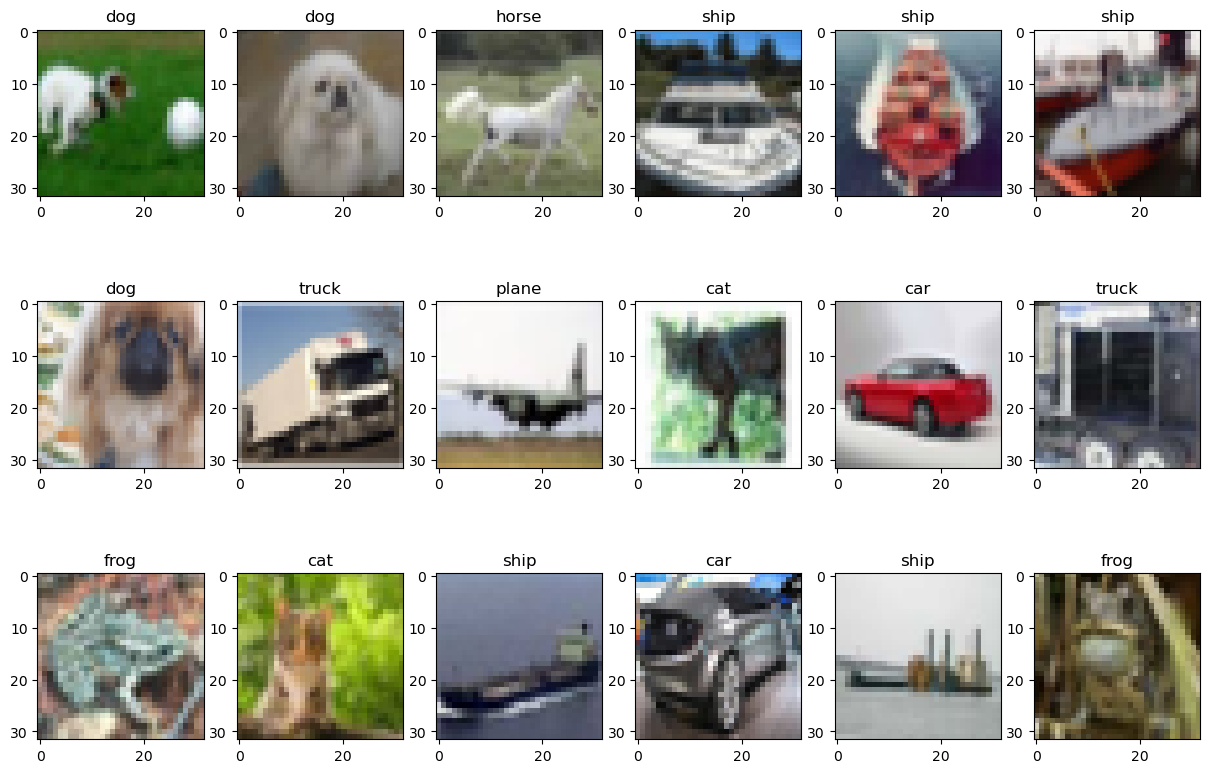

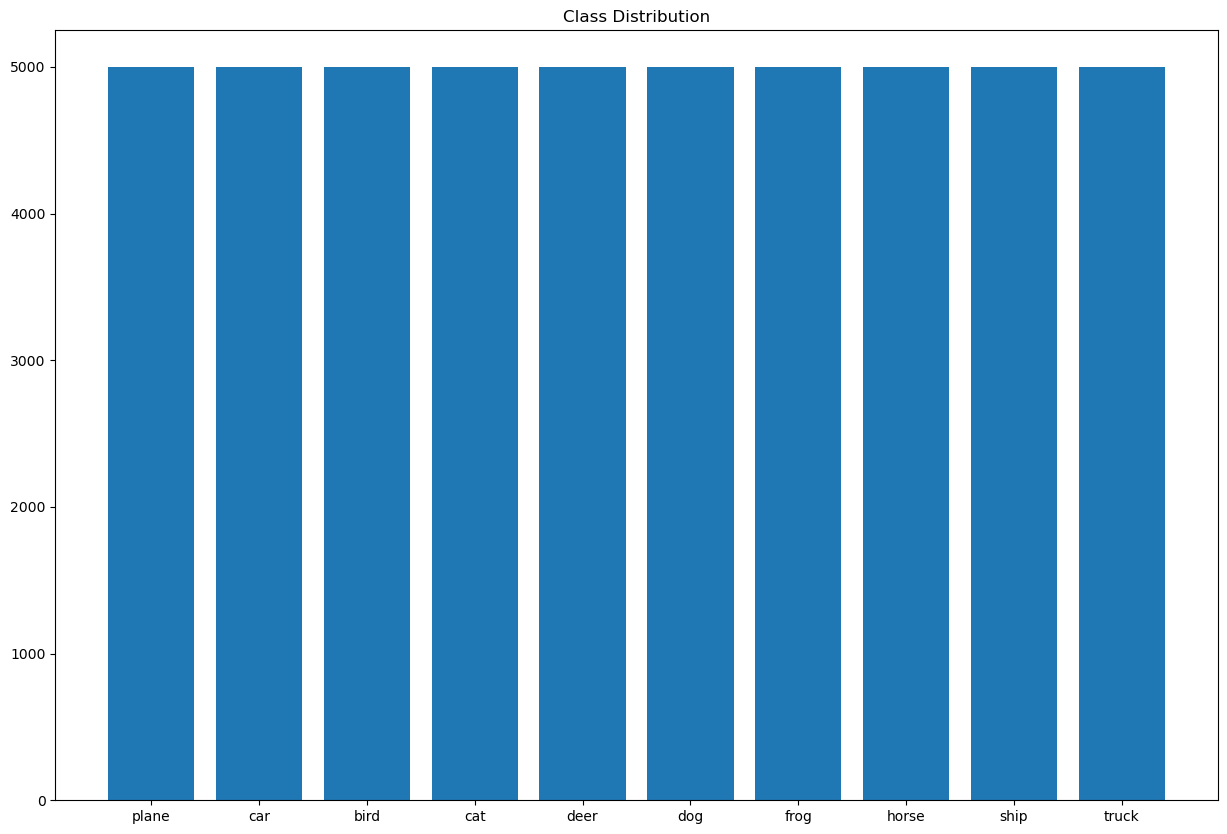

Class distribution: Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})


In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples
for ii in range(18):    
    plt.subplot(3, 6, ii + 1)
    idx = np.random.randint(0, x_train.shape[0])
    plt.imshow(x_train[idx])
    plt.title(classes[int(y_train[idx])])
plt.show()

# Compute the class histogram
train_hist = Counter(y_train.flatten())
plt.bar(classes.values(), [train_hist[i] for i in range(num_classes)])
plt.title("Class Distribution")
plt.show()

# Checking if dataset is balanced
print("Class distribution:", train_hist)

In [29]:
# Step 1: Data Preparation
# Normalize data to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


## Step 2: Building the Classifier

In [31]:
# Build the CNN model
def create_model():
    inputs = Input(shape=(size, size, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

model = create_model()
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Training

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2534 - loss: 2.0052 - val_accuracy: 0.4779 - val_loss: 1.4522
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.4576 - loss: 1.4899 - val_accuracy: 0.5636 - val_loss: 1.2212
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5394 - loss: 1.2894 - val_accuracy: 0.6219 - val_loss: 1.0793
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.5826 - loss: 1.1732 - val_accuracy: 0.6544 - val_loss: 0.9910
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.6209 - loss: 1.0735 - val_accuracy: 0.6731 - val_loss: 0.9374
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.6458 - loss: 1.0118 - val_accuracy: 0.6829 - val_loss: 0.9077
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.6648 - loss: 0.9589 - val_accuracy: 0.6977 - val_loss: 0.8705
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.6840 - loss: 0.9032 - 

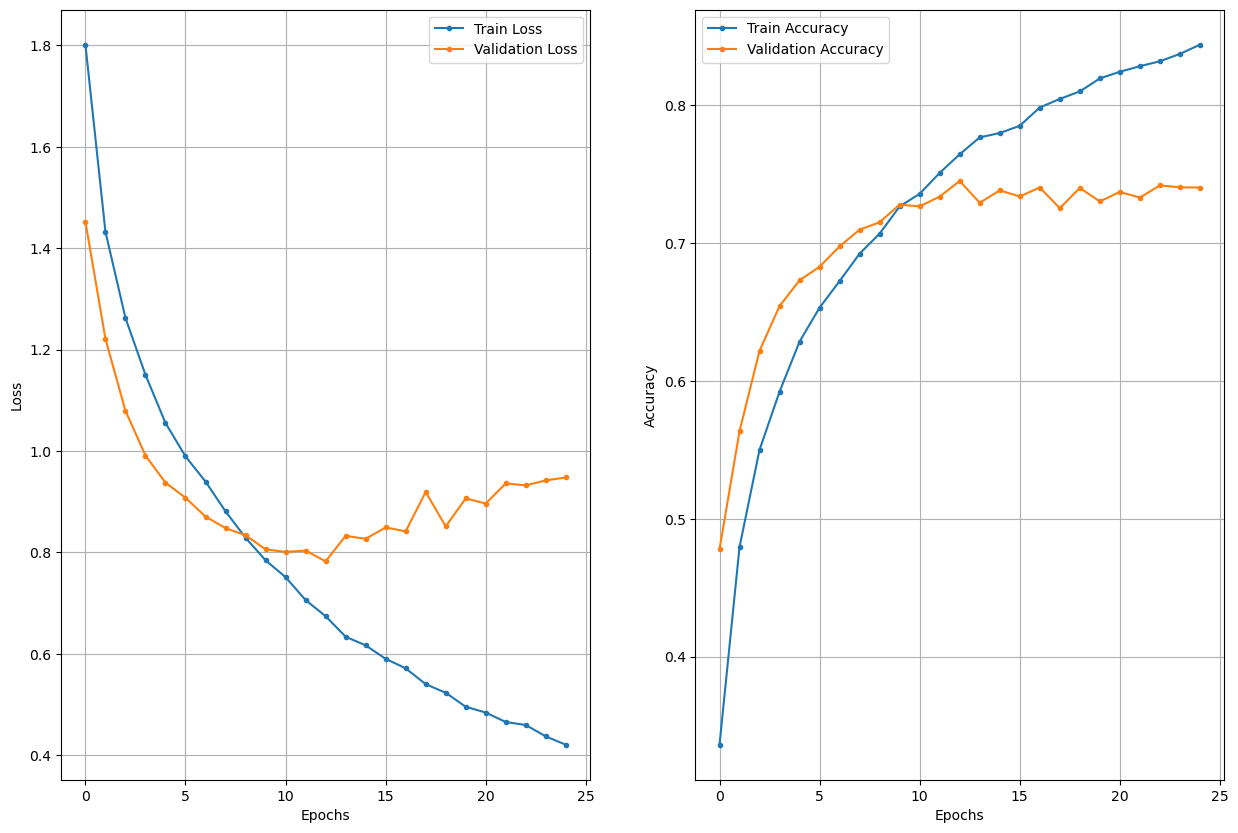

Train Accuracy      0.843999981880188
Validation Accuracy 0.7404000163078308


In [33]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.2, verbose=1)

# Show training history
h = history.history
epochs_range = range(len(h['loss']))

plt.subplot(121)
plt.plot(epochs_range, h['loss'], '.-', label='Train Loss')
plt.plot(epochs_range, h['val_loss'], '.-', label='Validation Loss')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs_range, h['accuracy'], '.-', label='Train Accuracy')
plt.plot(epochs_range, h['val_accuracy'], '.-', label='Validation Accuracy')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
print('Train Accuracy     ', h['accuracy'][-1])
print('Validation Accuracy', h['val_accuracy'][-1])

## Step 4: Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
plane: 0.80
car: 0.85
bird: 0.60
cat: 0.50
deer: 0.72
dog: 0.62
frog: 0.82
horse: 0.82
ship: 0.84
truck: 0.81
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7420 - loss: 0.9294
Test Loss:    0.9567605257034302
Test Accuracy: 0.7389000058174133


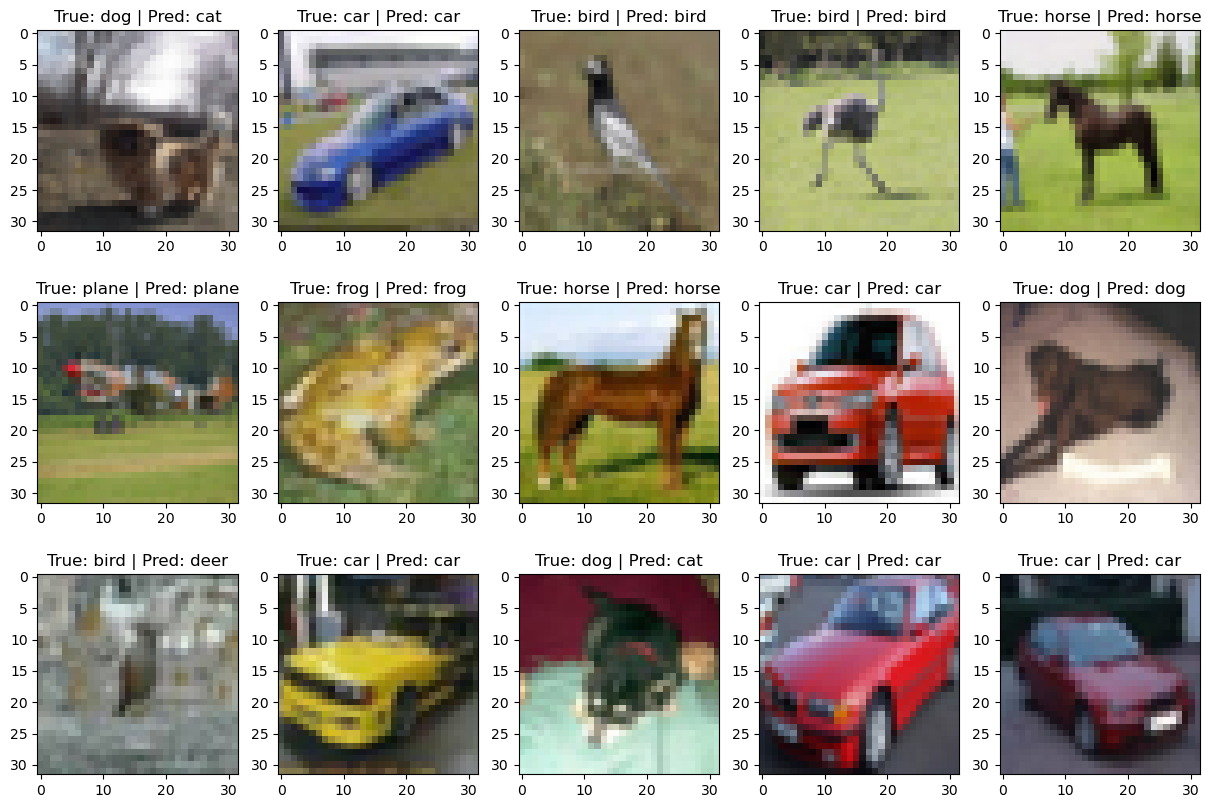

In [35]:
# Compute predictions
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    indices = np.where(y_true == class_id)[0]
    acc = np.mean(y_pred[indices] == y_true[indices])
    print(f'{class_name}: {acc:.2f}')

# Print overall stats
ev = model.evaluate(x_test, y_test)
print('Test Loss:   ', ev[0])
print('Test Accuracy:', ev[1])

# Visualize random samples with predictions
for ii in range(15):
    idx = np.random.randint(0, x_test.shape[0])
    plt.subplot(3, 5, ii + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {classes[y_true[idx]]} | Pred: {classes[y_pred[idx]]}")
plt.show()

### Questions
* What is the overall accuracy of the classifier?


Test Accuracy: 73.89%


* What modifications would you do in order to improve the classification accuracy?



First, we can use data augmentation to make the model see more different variations of images, such as those with small rotations, offsets, or mirroring. Second, you can make the network deeper by adding more convolutional layers, or use batch normalization



* Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?


I applied data augmentation to improve accuracy, and yes, it increased to 81.34%




In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Train the model using augmented data
history_augmented = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=25,
                              validation_data=(x_test, y_test))

# Evaluate the model
ev_augmented = model.evaluate(x_test, y_test)
print('Test Loss after Augmentation:  ', ev_augmented[0])
print('Test Accuracy after Augmentation:', ev_augmented[1])


Epoch 1/25


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7715 - loss: 0.6658 - val_accuracy: 0.7910 - val_loss: 0.6294
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.7747 - loss: 0.6518 - val_accuracy: 0.7957 - val_loss: 0.6082
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.7783 - loss: 0.6420 - val_accuracy: 0.7961 - val_loss: 0.6028
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.7798 - loss: 0.6439 - val_accuracy: 0.7977 - val_loss: 0.6095
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7838 - loss: 0.6360 - val_accuracy: 0.8028 - val_loss: 0.5902
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.7876 - loss: 0.6244 - val_accuracy: 0.7895 - val_loss: 0.6233
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7778 - loss: 0.6484 - val_accuracy: 0.7914 - val_loss: 0.6140
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7825 - loss: 0.6291 - val_accurac